<a href="https://colab.research.google.com/github/re71var/Topo/blob/main/elnino_mappers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

##Lectura de Datos

In [ ]:
data_inx= pd.read_csv('sstoi.indices.txt', header = None)
data_anom= pd.read_csv('nino34.long.anom.data.txt', header = None)

In [ ]:
print('sstoi.indices: instancia = mes, columna= temperatura y anomalia por región')
print(data_inx.head())
print('nino34.long.anom.data: instancia = año, columna = mes')
print(data_anom.head())

sstoi.indices: instancia = mes, columna= temperatura y anomalia por región
                                                   0
0  YR MON    NATL    ANOM    SATL    ANOM    TROP...
1  1982   1   25.67   -0.33   25.26   -0.34   27....
2  1982   2   25.35   -0.21   26.04   -0.44   27....
3  1982   3   25.37   -0.17   26.56   -0.46   27....
4  1982   4   25.36   -0.52   26.26   -0.65   28....
nino34.long.anom.data: instancia = año, columna = mes
                                                   0
0   1870    -1.00   -1.20   -0.83   -0.81   -1.27...
1   1871    -0.25   -0.58   -0.43   -0.50   -0.70...
2   1872    -0.72   -0.62   -0.50   -0.77   -0.62...
3   1873    -0.78   -1.01   -1.31   -0.67   -0.53...
4   1874    -0.93   -1.06   -1.40   -0.94   -0.86...


##Limpieza de datos (nino34)

In [ ]:
df =pd.read_csv("nino34.long.anom.data.txt", header=None, delim_whitespace=True)#anomalias de la region 34

In [ ]:
df.isnull().sum()
df.duplicated().sum()


0

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


In [ ]:
#Un overview
df.describe

<bound method NDFrame.describe of        0     1      2      3      4      5      6      7      8      9   \
0    1870 -1.00  -1.20  -0.83  -0.81  -1.27  -1.08  -1.04  -0.88  -0.53   
1    1871 -0.25  -0.58  -0.43  -0.50  -0.70  -0.53  -0.60  -0.33  -0.24   
2    1872 -0.72  -0.62  -0.50  -0.77  -0.62  -0.52  -0.32  -0.85  -1.02   
3    1873 -0.78  -1.01  -1.31  -0.67  -0.53  -0.48  -0.58  -0.39  -0.34   
4    1874 -0.93  -1.06  -1.40  -0.94  -0.86  -0.72  -1.00  -1.05  -1.13   
..    ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
145  2015  0.59   0.57   0.48   0.90   1.04   1.28   1.56   1.87   2.01   
146  2016  2.56   2.11   1.60   1.05   0.45   0.06  -0.25  -0.48  -0.46   
147  2017 -0.34  -0.01  -0.09   0.22   0.30   0.22   0.22  -0.18  -0.56   
148  2018 -0.86  -0.73  -0.73  -0.36  -0.12   0.12   0.27   0.05   0.30   
149  2019  0.51 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99   

        10     11     12  
0    -0.92  -0.79  -0.79  
1    -0.33 

In [ ]:
#Renombramos las columnas
df2 = df.rename(columns={col: f'column{i+1}' for i, col in enumerate(df.columns)}, inplace=True)

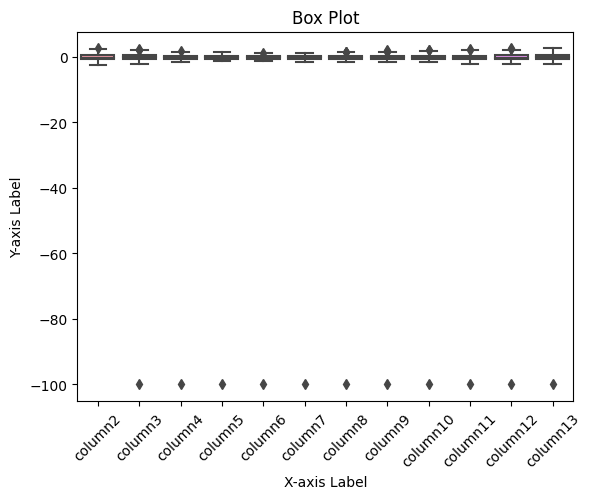

In [ ]:
import seaborn as sns
#Boxplot
sns.boxplot(data=df.drop('column1', axis=1))

# Set plot title and labels
plt.title("Box Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [ ]:
min(df['column3'])

-99.99

##Datos atípicos (nino34)

In [ ]:
for columns in df:
  for i in range(len(df['column3'])):
    if df['column3'][i]==-99.99:
      df['column3'][i]=0

<ipython-input-11-0569c13a63c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column3'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column4'])):
    if df['column4'][i]==-99.99:
      df['column4'][i]=0

<ipython-input-12-280d4e01cbfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column4'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column5'])):
    if df['column5'][i]==-99.99:
      df['column5'][i]=0

<ipython-input-13-8f1d964cb014>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column5'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column6'])):
    if df['column6'][i]==-99.99:
      df['column6'][i]=0

<ipython-input-14-dadba27c52d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column6'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column7'])):
    if df['column7'][i]==-99.99:
      df['column7'][i]=0

<ipython-input-15-417728f1cb98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column7'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column8'])):
    if df['column8'][i]==-99.99:
      df['column8'][i]=0

<ipython-input-16-5269bffce4fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column8'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column9'])):
    if df['column9'][i]==-99.99:
      df['column9'][i]=0

<ipython-input-17-e21f5befd3a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column9'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column10'])):
    if df['column10'][i]==-99.99:
      df['column10'][i]=0

<ipython-input-18-80416e4a8160>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column10'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column11'])):
    if df['column11'][i]==-99.99:
      df['column11'][i]=0

<ipython-input-19-a3faf86c57cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column11'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column12'])):
    if df['column12'][i]==-99.99:
      df['column12'][i]=0

<ipython-input-20-8d493122bda5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column12'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column13'])):
    if df['column13'][i]==-99.99:
      df['column13'][i]=0

<ipython-input-21-b4586e954e43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column13'][i]=0


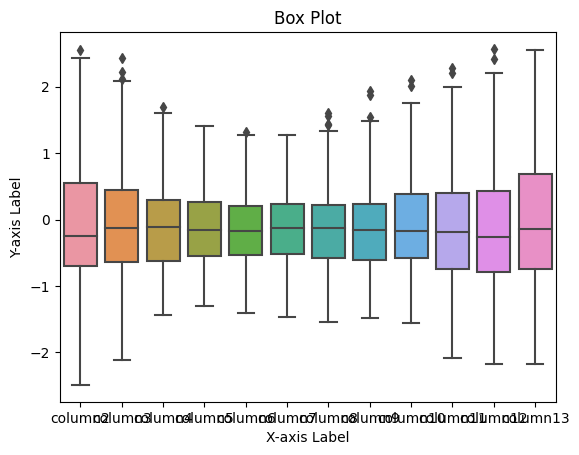

In [ ]:
sns.boxplot(data=df.drop('column1', axis=1))

# Set plot title and labels
plt.title("Box Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Show the plot
plt.show()

##Limpieza de datos (sstoi indices)

In [ ]:
df_sstoi =pd.read_csv("sstoi.indices.txt", header=None, delim_whitespace=True) #12 registros por año, con temperatura y anomalia por region

In [ ]:
# Quitar primera fila de nombres porque estorba
sstoi = df_sstoi.iloc[1:]

In [ ]:
sstoi.head()

,0,1,2,3,4,5,6,7
1,1982,1,25.67,-0.33,25.26,-0.34,27.38,-0.20
2,1982,2,25.35,-0.21,26.04,-0.44,27.57,-0.22
3,1982,3,25.37,-0.17,26.56,-0.46,27.94,-0.26
4,1982,4,25.36,-0.52,26.26,-0.65,28.40,-0.13
5,1982,5,26.11,-0.22,25.34,-0.80,28.46,0.02


In [ ]:
#Renombramos las columnas
df2 = sstoi.rename(columns={col: f'column{i+1}' for i, col in enumerate(sstoi.columns)}, inplace=True)

<ipython-input-17-da39138953a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 = sstoi.rename(columns={col: f'column{i+1}' for i, col in enumerate(sstoi.columns)}, inplace=True)


In [ ]:
sstoi.dtypes

column1    object
column2    object
column3    object
column4    object
column5    object
column6    object
column7    object
column8    object
dtype: object

In [ ]:
#Valores nulos y/o repetidos 
sstoi.isnull().sum()
sstoi.duplicated().sum()

1

In [ ]:
sstoi.describe()

,column1,column2,column3,column4,column5,column6,column7,column8
count,497,497,497,497,497,497,497,497
unique,42,12,274,159,315,155,186,132
top,2022,1,27.05,-0.11,26.32,0.13,27.41,-0.13
freq,13,42,6,9,6,12,9,17


In [ ]:
# Object -> float
sstoi= sstoi.astype(float)

In [ ]:
sstoi.head()

,column1,column2,column3,column4,column5,column6,column7,column8
1,1982.0,1.0,25.67,-0.33,25.26,-0.34,27.38,-0.20
2,1982.0,2.0,25.35,-0.21,26.04,-0.44,27.57,-0.22
3,1982.0,3.0,25.37,-0.17,26.56,-0.46,27.94,-0.26
4,1982.0,4.0,25.36,-0.52,26.26,-0.65,28.40,-0.13
5,1982.0,5.0,26.11,-0.22,25.34,-0.80,28.46,0.02


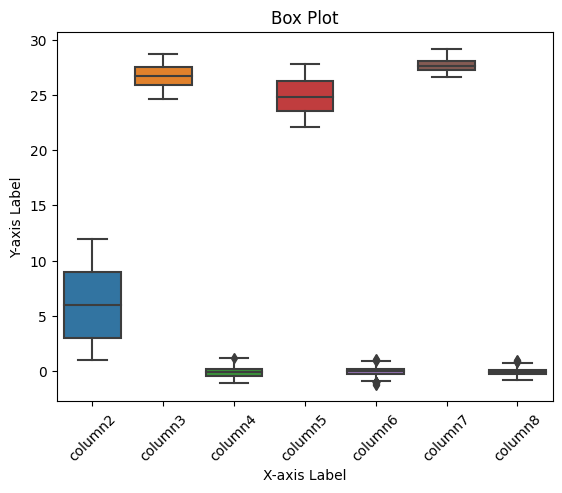

In [ ]:
#Boxplot
sns.boxplot(data=sstoi.drop('column1', axis=1))

# Set plot title and labels
plt.title("Box Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.xticks(rotation=45)
# Show the plot
plt.show()

##Series de tiempo

In [ ]:
!pip install sktime
!pip install plotly-express
!pip install git+https://github.com/manu-mannattil/nolitsa.git
!pip install giotto-tda 
!pip install scikit-learn

In [ ]:
import sktime
from sktime.datasets import load_uschange
import plotly_express as px
import plotly.graph_objs as go
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud
from nolitsa import dimension, delay
from sklearn.decomposition import PCA

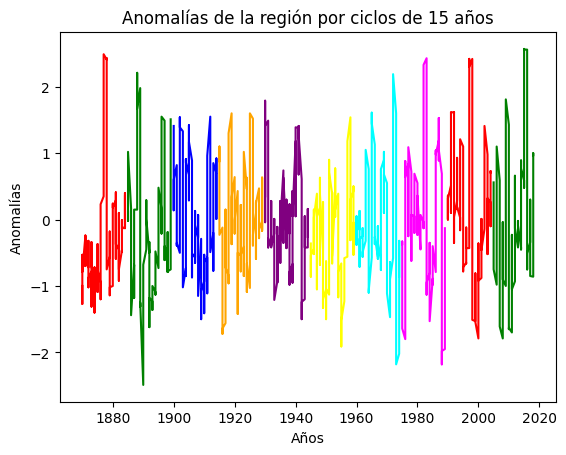

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer el DataFrame desde el archivo
df = pd.read_csv("nino34.long.anom.data.txt", header=None, delim_whitespace=True)

# Reemplazar los valores -99.99 por NaN
df = df.replace(-99.99, np.nan)

# Eliminar las filas que contienen NaN
df = df.dropna()

# Obtener el valor del primer año y el último año en el DataFrame
primer_anio = df.iloc[0, 0]
ultimo_anio = df.iloc[-1, 0]

# Calcular la cantidad de ciclos completos de 15 años que se pueden formar
cantidad_ciclos = (ultimo_anio - primer_anio + 1) // 15

# Calcular el último año del último ciclo incompleto (si existe)
ultimo_anio_incompleto = primer_anio + (cantidad_ciclos * 15) - 1

# Crear una lista para almacenar los datos de cada ciclo
ciclos = []

# Iterar sobre los ciclos completos de 15 años y guardar los datos en sublistas
for i in range(cantidad_ciclos):
    inicio = i * 15
    fin = inicio + 15
    ciclo = df[df.iloc[:, 0].between(primer_anio + inicio, primer_anio + fin - 1)]
    ciclos.append(ciclo)

# Verificar si hay un último ciclo incompleto y guardarlo en una sublista adicional
if ultimo_anio > ultimo_anio_incompleto:
    ultimo_ciclo = df[df.iloc[:, 0].between(ultimo_anio_incompleto + 1, ultimo_anio)]
    ciclos.append(ultimo_ciclo)

# Lista para almacenar los datos concatenados de todos los ciclos
datos_totales = []
anios_totales = []

# Lista de colores
colores = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Iterar sobre los ciclos y realizar el ploteo con colores diferentes
for i, ciclo in enumerate(ciclos):
    anios = ciclo.iloc[:, 0].values.repeat(12).tolist()  # Repetir cada año 12 veces
    datos = ciclo.iloc[:, 1:].values.flatten().tolist()
    datos_totales.extend(datos)
    anios_totales.extend(anios)
    color = colores[i % len(colores)]  # Seleccionar un color de la lista de colores
    plt.plot(anios, datos, color=color)

# Configurar los ejes y el título del gráfico
plt.xlabel("Años")
plt.ylabel("Anomalías")
plt.title("Anomalías de la región por ciclos de 15 años")

# Mostrar el gráfico
plt.show()




In [ ]:
print(ciclos)

[      0     1     2     3     4     5     6     7     8     9     10    11  \
0   1870 -1.00 -1.20 -0.83 -0.81 -1.27 -1.08 -1.04 -0.88 -0.53 -0.92 -0.79   
1   1871 -0.25 -0.58 -0.43 -0.50 -0.70 -0.53 -0.60 -0.33 -0.24 -0.33 -0.31   
2   1872 -0.72 -0.62 -0.50 -0.77 -0.62 -0.52 -0.32 -0.85 -1.02 -0.94 -0.79   
3   1873 -0.78 -1.01 -1.31 -0.67 -0.53 -0.48 -0.58 -0.39 -0.34 -0.78 -0.77   
4   1874 -0.93 -1.06 -1.40 -0.94 -0.86 -0.72 -1.00 -1.05 -1.13 -1.25 -1.33   
5   1875 -0.71 -0.37 -0.59 -0.87 -1.09 -0.76 -0.85 -0.81 -0.91 -0.83 -0.64   
6   1876 -0.95 -1.20 -1.13 -1.18 -1.08 -0.43 -0.34 -0.16 -0.02  0.11  0.15   
7   1877  0.35  0.46  0.52  0.50  0.76  0.98  1.42  1.54  1.75  1.95  2.08   
8   1878  2.41  2.43  1.31  0.92  0.82  0.92  0.25 -0.11 -0.32 -0.53 -0.70   
9   1879 -0.55 -0.18 -0.24 -0.37 -0.83 -0.67 -0.77 -0.69 -0.83 -0.93 -1.14   
10  1880 -1.00 -0.73 -0.62 -0.57 -0.71 -0.61 -0.53 -0.24 -0.03  0.17  0.24   
11  1881  0.29  0.23  0.32  0.41  0.16  0.23 -0.26 -0.17 -0.33 

Optimal time delay: 6
Optimal dimension: 5


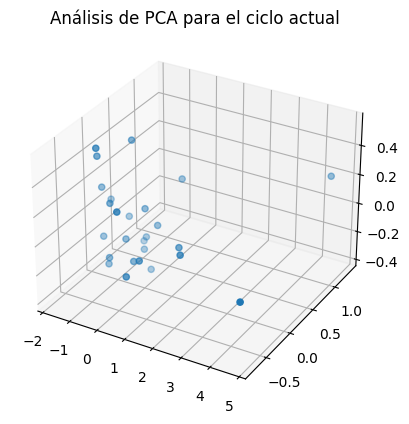

Optimal time delay: 5
Optimal dimension: 4


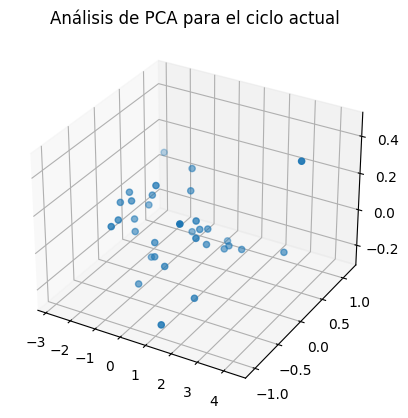

Optimal time delay: 3
Optimal dimension: 5


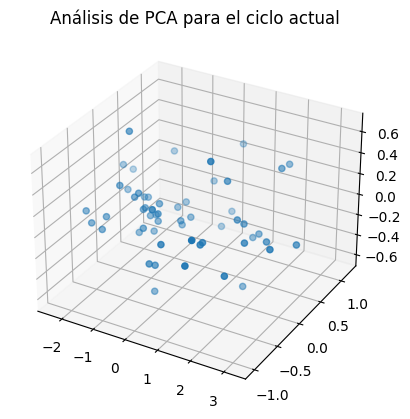

Optimal time delay: 3
Optimal dimension: 5


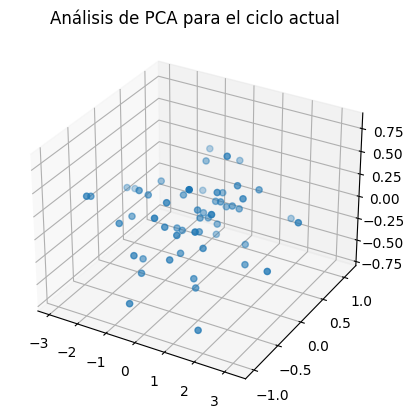

Optimal time delay: 1
Optimal dimension: 4


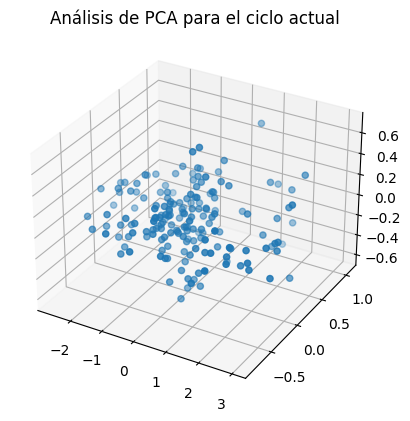

Optimal time delay: 6
Optimal dimension: 5


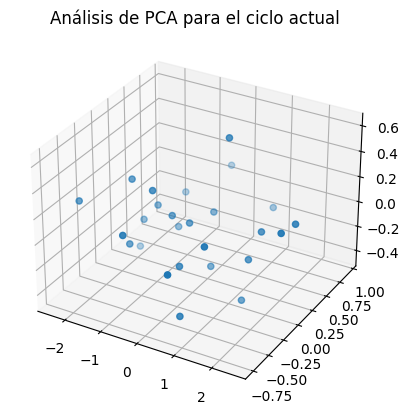

Optimal time delay: 8
Optimal dimension: 5


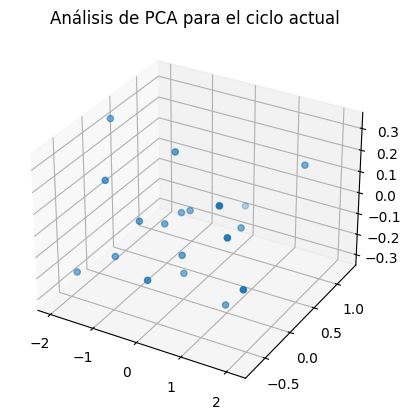

Optimal time delay: 9
Optimal dimension: 2


ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

max_periodic_dimension = 10
max_periodic_time_delay = 5
stride = 1

embedding_dimension_periodic = 8
embedding_time_delay_periodic = 16

# Crear una lista para almacenar los datos de cada ciclo
ciclos = []

# Iterar sobre los ciclos completos de 15 años y guardar los datos en sublistas
for i in range(cantidad_ciclos):
    inicio = i * 15
    fin = inicio + 15
    ciclo = df[df.iloc[:, 0].between(primer_anio + inicio, primer_anio + fin - 1)]
    ciclos.append(ciclo)

# Verificar si hay un último ciclo incompleto y guardarlo en una sublista adicional
if ultimo_anio > ultimo_anio_incompleto:
    ultimo_ciclo = df[df.iloc[:, 0].between(ultimo_anio_incompleto + 1, ultimo_anio)]
    ciclos.append(ultimo_ciclo)

# Iterar sobre los ciclos y realizar el análisis de embebido y PCA
for ciclo in ciclos:
    lista = []
    for i in range(len(ciclo)):
        for n in range(12):
              
            lista.append(ciclo[n+1].iloc[i])

    # Calcular los parámetros óptimos de embebido de Takens
    tau, d = takens_embedding_optimal_parameters(lista, max_periodic_dimension, max_periodic_time_delay, stride)
    print('Optimal time delay:', tau)
    print('Optimal dimension:', d)

    # Realizar el embebido de Takens con los parámetros óptimos
    embedded_data = np.array([lista[i:i + d] for i in range(0, len(lista) - (d - 1) * tau, tau)])

    # Realizar el análisis de PCA en el embebido de Takens
    pca = PCA(n_components=3)
    embedded_pca = pca.fit_transform(embedded_data)

    # Plotea el resultado del análisis de PCA
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embedded_pca[:, 0], embedded_pca[:, 1], embedded_pca[:, 2])
    ax.set_title("Análisis de PCA para el ciclo actual")
    plt.show()


In [ ]:
def calculate_correlation(data):
    # Calcular la matriz de correlación de Pearson
    correlation_matrix = np.corrcoef(data.T)

    # Obtener la correlación promedio
    average_correlation = np.mean(correlation_matrix)

    return average_correlation


In [ ]:
lista = []
for i in range(149):
  for n in range(12):
    col = 'column'+str(n+2)   
    lista.append(df[col][i])

KeyError: ignored

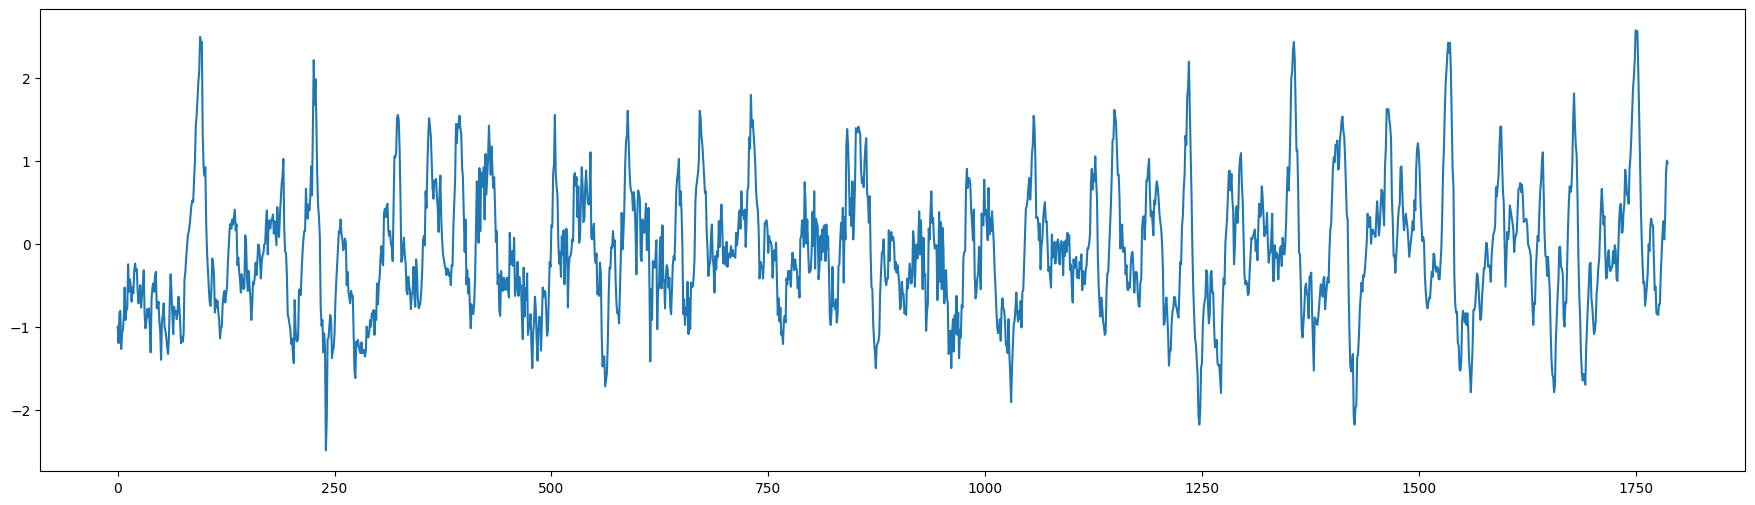

In [ ]:
plt.figure(figsize=(22,6))
plt.plot(list(range(len(lista))),lista)
plt.show()

In [ ]:
!pip install git+https://github.com/manu-mannattil/nolitsa.git
!pip install giotto-tda 
!pip install scikit-learn

In [ ]:
max_periodic_dimension=60
max_periodic_time_delay=60
stride=1
tau,d= takens_embedding_optimal_parameters(lista, max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

NameError: ignored

In [ ]:
embedding_dimension_periodic = 8
embedding_time_delay_periodic = 16
stride = 1
embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

embeded_lista = embedder_periodic.fit_transform(lista)
print(f"Shape of embedded time series: {embeded_lista.shape}")
pca = PCA(n_components=3)
embedded_pca = pca.fit_transform(embeded_lista)
plot_point_cloud(embedded_pca)

Shape of embedded time series: (1676, 8)


In [ ]:
!pip install ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=687024 sha256=ca1097ae305454fb3f6a646ab9d39b861d4f7a14338e5d6a6716c51d68ca2a74
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=00a49d1dc46c2251f76b34116b72960980f8ede5f93c2cffe6c300b4e4dcba6b
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built rip

In [ ]:
import ripser
import persim

ModuleNotFoundError: ignored

In [ ]:
ripsernonperiod=ripser.ripser(embeded_lista)['dgms']

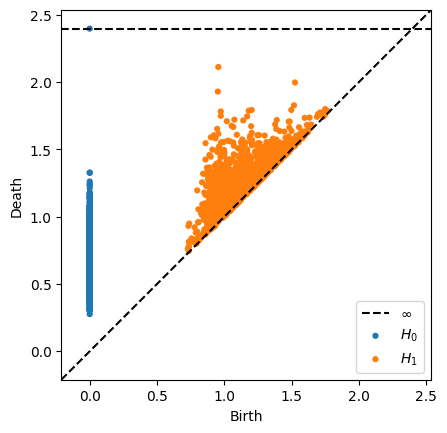

In [ ]:
persim.plot_diagrams(
    ripsernonperiod, 
    show=True
) 

In [ ]:
!pip install kmapper
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=7a8618d733fb398c1e904eb4d30f2e75ecd3013ffc4724eea90ce78b94b446a0
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=76378824d626058a289b4ba04a4a7b45a635a40c0afaf76f275f2e87fe8f5280
  Stored in directory: /root/.cache/pip/wheels/4a/38/5

In [ ]:
import yfinance as yf
import kmapper as km
from kmapper.jupyter import display
import umap #Uniform Manifold Approximation and Projection for Dimension Reduction
import sklearn
import sklearn.manifold as manifold #https://scikit-learn.org/stable/modules/manifold.html
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
lista_np=np.array(lista)

In [ ]:
lista_y = []
for i in range(149):
  for n in range(12): 
    lista_y.append(df['column1'][i])
len(lista_y)

1788

In [ ]:
data_mapp = np.stack((lista_np, lista_y), axis=0)

In [ ]:
data_mapp=data_mapp.transpose()

In [ ]:
z=np.asarray(lista_y)

In [ ]:
data_mapp.shape

(1788, 2)

In [ ]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data_mapp, projection=manifold.Isomap(n_components=100, n_jobs=-1))#projection [0,1], isomap, umap
G = mapper.map(projected_data, data_mapp, clusterer=sklearn.cluster.DBSCAN(metric="cosine"))#cosine, eucledian, kmeans

In [ ]:
G['meta_data']['clusterer']


In [ ]:
#definir un nombre de archivo para guardar los parámetros de Mapper
fileID = 'projection=' + G['meta_data']['projection'].split('(')[0] + '_' + \
'clusterer=' + G['meta_data']['clusterer']

mapper.visualize(G, 
                title=fileID,
                custom_tooltips =z,
                color_values = z,
                color_function_name = 'Year',
                node_color_function=np.array(['average','std','sum','max','min']),
                path_html="mapper_example_" + fileID + ".html")

km.jupyter.display("mapper_example_" + fileID + ".html")